In [1]:
# !pip install statsmodels

In [2]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [3]:
# Specify the path to the CSV file
file_path = 'C:/Users/bakwe/Desktop/BSE/Text_mining/HW1/Scraped_data/Barcelona_05_29_06_02.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Adding 'barcelona' column with values equal to 1
df['barcelona'] = 1

# Adding the 'event' column with values equal to 1
df['event'] = 1

# Display the DataFrame
print(df.shape)

(431, 10)


In [4]:
# Specify the path to the CSV file
file_path = 'C:/Users/bakwe/Desktop/BSE/Text_mining/HW1/Scraped_data/Valencia_05_29_06_02.csv'

# Read the CSV file into a DataFrame
V1 = pd.read_csv(file_path)

# Adding rows from V1 to df with 'barcelona' values set to 0 and 'event' values set to 1
df = pd.concat([df, V1.assign(barcelona=0, event=1)], ignore_index=True)

# Displaying the updated df DataFrame
print("\nUpdated df after adding rows from V1:")
print(df.shape)



Updated df after adding rows from V1:
(754, 10)


In [5]:
# Specify the path to the CSV file
file_path = 'C:/Users/bakwe/Desktop/BSE/Text_mining/HW1/Scraped_data/Valencia_05_24_05_28.csv'

# Read the CSV file into a DataFrame
V0 = pd.read_csv(file_path)

# Adding rows from V1 to df with 'barcelona' values set to 0 and 'event' values set to 0
df = pd.concat([df, V0.assign(barcelona=0, event=0)], ignore_index=True)

# Displaying the updated df DataFrame
print("\nUpdated df after adding rows from V1:")
print(df.shape)


Updated df after adding rows from V1:
(1142, 10)


In [6]:
# Specify the path to the CSV file
file_path = 'C:/Users/bakwe/Desktop/BSE/Text_mining/HW1/Scraped_data/Barcelona_05_24_05_28.csv'

# Read the CSV file into a DataFrame
B0 = pd.read_csv(file_path)

# Adding rows from B0 to df with 'barcelona' values set to 1 and 'event' values set to 0
df = pd.concat([df, B0.assign(barcelona=1, event=0)], ignore_index=True)

# Displaying the updated df DataFrame
print("\nUpdated df after adding rows from V1:")
print(df.shape)
print(df.columns)


Updated df after adding rows from V1:
(1559, 10)
Index(['Hotels', 'Ratings', 'Distance', 'District', 'Price', 'Link', 'Star',
       'Descriptions', 'barcelona', 'event'],
      dtype='object')


In [7]:
# Create a DataFrame
df = pd.DataFrame(df)

In [8]:
# First, count the occurrences of each value in the 'Hotels' column
hotel_counts = df['Hotels'].value_counts()

# Then, create a new DataFrame containing only rows with 'Hotels' values that appear twice
filtered_df = df[df['Hotels'].isin(hotel_counts[hotel_counts == 2].index)]

# Finally, print the count of 'Hotels' values
print(hotel_counts[hotel_counts == 2])

Residencia Universitaria Campus del Mar                     2
Hotel Casa Fuster G.L Monumento                             2
Via Sants Hotel Barcelona, Tapestry Collection By Hilton    2
NH Barcelona Diagonal Center                                2
INNSiDE by Meliá Barcelona Apolo                            2
                                                           ..
Gaudi Hotel                                                 2
Suite Place Barcelona Diputació                             2
MH Apartments Gracia                                        2
Aparthotel Allada 3*                                        2
Barcelona Apartment Val                                     2
Name: Hotels, Length: 272, dtype: int64


In [9]:
# Find the 'Price' value when 'Hotels' is equal to 'Ohla Barcelona'
ohla_barcelona_price = df.loc[df['Hotels'] == 'Ohla Barcelona', 'Price'].values[0]

# Print the 'Price' value
print("Price for 'Hotels' == 'Ohla Barcelona':", ohla_barcelona_price)

Price for 'Hotels' == 'Ohla Barcelona': € 1.903


In [10]:
# Extract only digits from the 'Price' column and convert to numeric
df['Price'] = pd.to_numeric(df['Price'].str.replace('[^\d]', '', regex=True), errors='coerce')

# Extract the first digit and convert to numeric
df['Star'] = pd.to_numeric(df['Star'].str.extract('(\d)', expand=False), errors='coerce')

# Display the updated DataFrame
print(df.head())

                                   Hotels Ratings             Distance  \
0  Ciudad Condal Hostal - Paseo de Gracia     7,2    a 1 km del centro   
1        DO Plaça Reial powered by Sonder     8,4  a 0,9 km del centro   
2                   SEALONA VILA OLIMPICA     8,4  a 1,8 km del centro   
3                  Habitaciones Viladomat     8,0  a 1,7 km del centro   
4       Nice apartment BCN two rooms wifi     8,4    a 2 km del centro   

   District  Price                                               Link  Star  \
0       NaN    720  https://www.booking.com/hotel/es/ciudad-condal...     3   
1       NaN   1920  https://www.booking.com/hotel/es/do.es.html?la...     5   
2       NaN    360  https://www.booking.com/hotel/es/sealona-vila-...     4   
3       NaN    374  https://www.booking.com/hotel/es/habitaciones-...     4   
4       NaN    398  https://www.booking.com/hotel/es/nice-apartmen...     4   

                                        Descriptions  barcelona  event  
0  El H

In [11]:
# Find the 'Price' value when 'Hotels' is equal to 'Ohla Barcelona'
ohla_barcelona_price = df.loc[df['Hotels'] == 'Ohla Barcelona', 'Price'].values[0]

# Print the 'Price' value
print("Price for 'Hotels' == 'Ohla Barcelona':", ohla_barcelona_price)

Price for 'Hotels' == 'Ohla Barcelona': 1903


In [12]:
# Display the count of NaN values in each column
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1559 entries, 0 to 1558
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Hotels        1559 non-null   object 
 1   Ratings       1559 non-null   object 
 2   Distance      1559 non-null   object 
 3   District      0 non-null      float64
 4   Price         1559 non-null   int64  
 5   Link          1559 non-null   object 
 6   Star          1559 non-null   int64  
 7   Descriptions  1523 non-null   object 
 8   barcelona     1559 non-null   int64  
 9   event         1559 non-null   int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 121.9+ KB
None


In [13]:
# Group the DataFrame by 'barcelona' and 'event' columns and calculate the mean of 'Price'
result = df.groupby(['barcelona', 'event'])['Price'].mean().reset_index()

# Order the result DataFrame by the 'Star' column
# result = result.sort_values(by=['Star'])

# 'result' will now contain the average 'Price' for each combination of 'barcelona' and 'event'
print(result)

   barcelona  event        Price
0          0      0   624.930412
1          0      1   568.436533
2          1      0   916.901679
3          1      1  1479.805104


In [14]:
# Count the occurrences of each unique value in the 'Star' column
star_counts = df['Star'].value_counts()

# Print the count of values for each unique 'Star'
print(star_counts)

4    754
3    595
2    109
5     61
1     40
Name: Star, dtype: int64


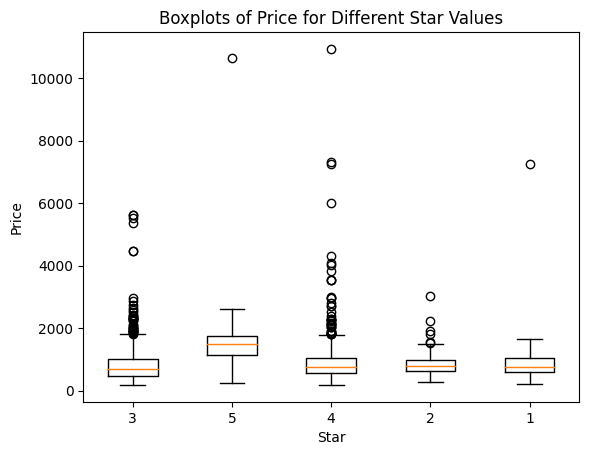

In [15]:
# Group the DataFrame by the 'Star' column and create boxplots for each group
plt.boxplot([df['Price'][df['Star'] == star] for star in df['Star'].unique()], 
            labels=df['Star'].unique())
plt.xlabel('Star')
plt.ylabel('Price')
plt.title('Boxplots of Price for Different Star Values')
plt.show()

In [16]:
# Independent variables
X = df[['barcelona']]

# Dependent variable
y = df['Price']

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print out the regression results
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.561
Model:                            OLS   Adj. R-squared (uncentered):              0.561
Method:                 Least Squares   F-statistic:                              1991.
Date:                Wed, 31 Jan 2024   Prob (F-statistic):                   8.49e-281
Time:                        09:05:22   Log-Likelihood:                         -12604.
No. Observations:                1559   AIC:                                  2.521e+04
Df Residuals:                    1558   BIC:                                  2.521e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [17]:
# Independent variables
X = df[['event']]

# Dependent variable
y = df['Price']

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print out the regression results
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.409
Model:                            OLS   Adj. R-squared (uncentered):              0.409
Method:                 Least Squares   F-statistic:                              1078.
Date:                Wed, 31 Jan 2024   Prob (F-statistic):                   3.53e-180
Time:                        09:05:22   Log-Likelihood:                         -12835.
No. Observations:                1559   AIC:                                  2.567e+04
Df Residuals:                    1558   BIC:                                  2.568e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [18]:
# Adding the interaction term
df['interaction_term'] = df['barcelona'] * df['event']

# Independent variables
X = df[['barcelona', 'event', 'interaction_term']]

# Dependent variable
y = df['Price']

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print out the regression results
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.639
Model:                            OLS   Adj. R-squared (uncentered):              0.639
Method:                 Least Squares   F-statistic:                              919.6
Date:                Wed, 31 Jan 2024   Prob (F-statistic):                        0.00
Time:                        09:05:22   Log-Likelihood:                         -12450.
No. Observations:                1559   AIC:                                  2.491e+04
Df Residuals:                    1556   BIC:                                  2.492e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [19]:
# Adding the interaction term
df['interaction_term'] = df['barcelona'] * df['event']

# Independent variables
X = df[['barcelona', 'event', 'interaction_term']]

# Dependent variable
y = df['Price']

# Adding a constant term to the independent variables
X = sm.add_constant(X)

# Fit the regression model without adding a constant term
model = sm.OLS(y, X).fit()

# Print out the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.247
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     169.7
Date:                Wed, 31 Jan 2024   Prob (F-statistic):           3.63e-95
Time:                        09:05:22   Log-Likelihood:                -12284.
No. Observations:                1559   AIC:                         2.458e+04
Df Residuals:                    1555   BIC:                         2.460e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              624.9304     32.503  

In [20]:
# Adding the interaction term
df['interaction_term'] = df['barcelona'] * df['event']

# Independent variables
X = df[['barcelona', 'event', 'Star', 'interaction_term']]

# Dependent variable
y = df['Price']

# Adding a constant term to the independent variables
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print out the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.259
Method:                 Least Squares   F-statistic:                     137.5
Date:                Wed, 31 Jan 2024   Prob (F-statistic):          1.23e-100
Time:                        09:05:22   Log-Likelihood:                -12269.
No. Observations:                1559   AIC:                         2.455e+04
Df Residuals:                    1554   BIC:                         2.457e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              215.4028     80.394  

In [21]:
# Create a new column 'Top_star' based on the condition
df['Top_star'] = (df['Star'].isin([4, 5])).astype(int)


In [22]:
# Calculate the number of observations meeting the specified conditions
num_observations = df[(df['barcelona'] == 1) & (df['Top_star'] == 1) & (df['event'] == 1)].shape[0]

# Display the result
print("Number of observations:", num_observations)

Number of observations: 220


In [23]:
# Adding the interaction term
df['interaction_term'] = df['barcelona'] * df['event']

# Independent variables
X = df[['barcelona', 'event', 'Top_star', 'interaction_term']]

# Dependent variable
y = df['Price']

# Adding a constant term to the independent variables
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print out the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.254
Method:                 Least Squares   F-statistic:                     133.4
Date:                Wed, 31 Jan 2024   Prob (F-statistic):           4.69e-98
Time:                        09:05:22   Log-Likelihood:                -12275.
No. Observations:                1559   AIC:                         2.456e+04
Df Residuals:                    1554   BIC:                         2.459e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              536.2118     38.254  